In [2]:
from konlpy.tag import Okt
import re
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from itertools import zip_longest
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from tqdm import tqdm
import pickle
import glob
from datetime import datetime, timedelta
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


pyLDAvis.enable_notebook()


In [8]:
def load_stopwords(file_path):
    """
    file_path 경로에서 불용어를 불러오는 함수
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()
    return stopwords


def preprocess_text(text, stopwords=None):
    """
    Okt를 사용한 텍스트 전처리 함수
    - 불용어 제거
    - 명사 추출
    """
    okt = Okt()
    # 정규 표현식을 사용한 숫자/특수문자 제거
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    nouns = okt.nouns(text)

    if stopwords:
        nouns = [word for word in nouns if word not in stopwords]
    
    # 길이가 1인 단어들 제거
    nouns = [word for word in nouns if len(word) > 1]

    processed_text = ' '.join(nouns)

    return processed_text


def load_and_merge_section_data(section_number, hours_back=9):
    """
    섹션 번호에 해당하는 모든 pkl 파일을 불러와서 기사 본문을 개별 문서로 병합하는 함수
    현재 시간에서 -hours_back 시간 전까지의 파일만 병합
    """
    current_time = datetime.now()
    start_time = current_time - timedelta(hours=hours_back)

    valid_hours = []
    for hour in range(hours_back + 1):  # 0부터 hours_back까지의 시간을 계산
        valid_hour = (start_time + timedelta(hours=hour)).strftime('%H')
        valid_hours.append(valid_hour)

    file_patterns = [f"./data/{section_number}/*_{hour}.pkl" for hour in valid_hours]

    merged_content = []
    for file_pattern in tqdm(file_patterns, desc=f"섹션 번호: {section_number} 파일"):
        file_list = glob.glob(file_pattern)

        for file_path in file_list:
            print(file_path)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
                for article in data:
                    merged_content.append(article['content'])

    print("병합한 기사 개수: " + str(len(merged_content)))

    return merged_content  # 각각의 기사를 리스트 형태로 반환

def visualize_lda_model(lda_model, corpus, dictionary):
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    return vis

# def process_sections(section_numbers, stopwords_file_path, hours_back=9):
#     """
#     주어진 섹션 번호 리스트에 대해 각 섹션별로 데이터를 병합하고 전처리하는 함수
#     """
#     # 불용어 로드
#     print("불용어를 불러오는 중입니다...")
#     stopwords = load_stopwords(stopwords_file_path)

#     processed_documents = []

#     for section_number in tqdm(section_numbers, desc="섹션 처리중"):
#         # 데이터 병합 (각 기사별로 처리)
#         merged_content_list = load_and_merge_section_data(section_number, hours_back)

#          # 각 기사를 개별 문서로 전처리
#         for content in merged_content_list:
#             processed_text = preprocess_text(content, stopwords)
#             processed_documents.append()
#             processed_documents.append(processed_text.split())  # 리스트 형태로 추가

#     return processed_documents  # 문서 리스트 반환

In [9]:
# def prepare_data_for_lda(doc):
#     """
#     LDA를 위한 데이터를 준비하는 함수
#     - doc: 전처리된 텍스트 데이터 (단일 섹션의 텍스트)
#     """
#     # 전처리된 문서를 리스트로 변환
#     text = doc.split()

#     # 딕셔너리 생성
#     dictionary = corpora.Dictionary([text])

#     # 코퍼스 생성(단어의 빈도수로 변환된 텍스트 데이터)
#     corpus = [dictionary.doc2bow(text)]

#     return dictionary, corpus

In [10]:
section_numbers = [100, 101, 102, 103, 104, 105]
stopwords_file_path = './data/korean_stopwords.txt'


section_documents = []

for section_number in section_numbers:
    stopwords = load_stopwords(stopwords_file_path)

    processed_documents = []

    merged_content_list = load_and_merge_section_data(section_number, hours_back=9)

    for content in merged_content_list:
        processed_text = preprocess_text(content, stopwords)
        processed_documents.append(processed_text.split())

    section_documents.append(processed_documents)
    

print(len(section_documents))



# processed_docs = process_sections(section_numbers, stopwords_file_path)


섹션 번호: 100 파일:   0%|          | 0/10 [00:00<?, ?it/s]

섹션 번호: 100 파일: 100%|██████████| 10/10 [00:00<00:00, 302.26it/s]


./data/100\2024-09-20_09.pkl
./data/100\2024-09-20_10.pkl
./data/100\2024-09-24_11.pkl
병합한 기사 개수: 224


섹션 번호: 101 파일: 100%|██████████| 10/10 [00:00<00:00, 817.24it/s]


./data/101\2024-09-20_09.pkl
./data/101\2024-09-20_10.pkl
./data/101\2024-09-24_11.pkl
병합한 기사 개수: 916


섹션 번호: 102 파일: 100%|██████████| 10/10 [00:00<00:00, 998.62it/s]


./data/102\2024-09-20_09.pkl
./data/102\2024-09-20_10.pkl
./data/102\2024-09-24_11.pkl
병합한 기사 개수: 953


섹션 번호: 103 파일: 100%|██████████| 10/10 [00:00<00:00, 1413.13it/s]


./data/103\2024-09-20_09.pkl
./data/103\2024-09-20_10.pkl
./data/103\2024-09-24_11.pkl
병합한 기사 개수: 142


섹션 번호: 104 파일: 100%|██████████| 10/10 [00:00<00:00, 1428.43it/s]


./data/104\2024-09-20_09.pkl
./data/104\2024-09-20_10.pkl
./data/104\2024-09-24_11.pkl
병합한 기사 개수: 213


섹션 번호: 105 파일: 100%|██████████| 10/10 [00:00<00:00, 1957.03it/s]


./data/105\2024-09-20_09.pkl
./data/105\2024-09-20_10.pkl
./data/105\2024-09-24_11.pkl
병합한 기사 개수: 114
6


In [14]:
# section_documents[5]

In [121]:
# 6개의 섹션에 대해 토픽 모델링 수행
for i in range(len(section_numbers)):
    dictionary = corpora.Dictionary(section_documents[i])
    corpus = [dictionary.doc2bow(text) for text in section_documents[i]]

    NUM_TOPICS = 3

    lda_model = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = lda_model.print_topics(num_words=10)
    print(str(i+1 * 100) + "섹션의 토픽들")
    for topic in topics:
        print(topic)

    # 시각화 실행
    visualization = visualize_lda_model(lda_model, corpus, dictionary)
    pyLDAvis.save_html(visualization, f'lda_vis_{i+1*100}.html')

    

100섹션의 토픽들
(0, '0.013*"대통령" + 0.012*"민주당" + 0.011*"의원" + 0.010*"대표" + 0.009*"여사" + 0.009*"국민" + 0.007*"후보" + 0.007*"공천" + 0.007*"국회" + 0.007*"김건희"')
(1, '0.021*"대표" + 0.018*"독대" + 0.017*"대통령" + 0.012*"국민" + 0.011*"대통령실" + 0.008*"만찬" + 0.008*"금투세" + 0.008*"의원" + 0.007*"요청" + 0.007*"북한"')
(2, '0.015*"지금" + 0.013*"대표" + 0.012*"대통령" + 0.011*"통일" + 0.010*"얘기" + 0.009*"북한" + 0.007*"주장" + 0.007*"국민" + 0.007*"대해" + 0.006*"의원"')
101섹션의 토픽들
(0, '0.005*"사업" + 0.005*"개발" + 0.004*"가구" + 0.004*"예정" + 0.004*"제공" + 0.004*"미국" + 0.004*"분양" + 0.003*"브랜드" + 0.003*"투자" + 0.003*"서울"')
(1, '0.008*"금리" + 0.008*"시장" + 0.007*"미국" + 0.006*"가격" + 0.006*"증가" + 0.005*"지수" + 0.005*"인하" + 0.005*"주가" + 0.005*"상승" + 0.005*"투자"')
(2, '0.012*"고려아연" + 0.010*"기업" + 0.007*"투자" + 0.006*"기술" + 0.006*"경영" + 0.006*"사업" + 0.006*"회장" + 0.005*"파트너" + 0.005*"반도체" + 0.004*"회사"')
102섹션의 토픽들
(0, '0.006*"병원" + 0.006*"서울" + 0.005*"지역" + 0.004*"의원" + 0.004*"환자" + 0.004*"지난" + 0.003*"올해" + 0.003*"기자" + 0.003*"의료" + 0.003*"사업"')
(1, '0.00

## 문서 병합(섹션별 X, 전체 O)

In [18]:
def process_documents(section_numbers, stopwords_file_path, hours_back=9):

    stopwords = load_stopwords(stopwords_file_path)

    processed_documents = []
    
    for section_number in section_numbers:
        merged_content_list = load_and_merge_section_data(section_number, hours_back)
        for content in merged_content_list:
            processed_text = preprocess_text(content, stopwords)
            processed_documents.append(processed_text.split())

    return processed_documents

In [19]:
section_numbers = [100, 101, 102, 103, 104, 105]
stopwords_file_path = './data/korean_stopwords.txt'

processed_documents = process_documents(section_numbers, stopwords_file_path)

섹션 번호: 100 파일: 100%|██████████| 10/10 [00:00<00:00, 1581.86it/s]


./data/100\2024-09-20_09.pkl
./data/100\2024-09-20_10.pkl
./data/100\2024-09-24_11.pkl
병합한 기사 개수: 224


섹션 번호: 101 파일: 100%|██████████| 10/10 [00:00<00:00, 1302.94it/s]


./data/101\2024-09-20_09.pkl
./data/101\2024-09-20_10.pkl
./data/101\2024-09-24_11.pkl
병합한 기사 개수: 916


섹션 번호: 102 파일: 100%|██████████| 10/10 [00:00<00:00, 3837.07it/s]


./data/102\2024-09-20_09.pkl
./data/102\2024-09-20_10.pkl
./data/102\2024-09-24_11.pkl
병합한 기사 개수: 953


섹션 번호: 103 파일: 100%|██████████| 10/10 [00:00<00:00, 1260.23it/s]


./data/103\2024-09-20_09.pkl
./data/103\2024-09-20_10.pkl
./data/103\2024-09-24_11.pkl
병합한 기사 개수: 142


섹션 번호: 104 파일: 100%|██████████| 10/10 [00:00<00:00, 4822.70it/s]


./data/104\2024-09-20_09.pkl
./data/104\2024-09-20_10.pkl
./data/104\2024-09-24_11.pkl
병합한 기사 개수: 213


섹션 번호: 105 파일: 100%|██████████| 10/10 [00:00<?, ?it/s]


./data/105\2024-09-20_09.pkl
./data/105\2024-09-20_10.pkl
./data/105\2024-09-24_11.pkl
병합한 기사 개수: 114


In [20]:
dictionary = corpora.Dictionary(processed_documents)

# dictionary.filter_extremes(no_below=5, no_above=0.10)
corpus = [dictionary.doc2bow(text) for text in processed_documents]

print(dictionary)
print(corpus)

Dictionary<23344 unique tokens: ['개입', '검찰', '경우', '공군', '공약']...>
[[(0, 5), (1, 1), (2, 1), (3, 1), (4, 1), (5, 7), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 4), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 3), (19, 1), (20, 2), (21, 3), (22, 6), (23, 6), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 2), (45, 2), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 2), (68, 1), (69, 1), (70, 1), (71, 3), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1)], [(0, 1), (5, 10), (8, 2), (12, 1), (15, 7), (18, 3), (20, 3), (24, 4), (25, 1), (30, 2), (31, 1), (41, 1), (47, 18), (48, 1), (62, 1), (68, 1), (71, 1), (72, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 4), (86,

In [13]:
NUM_TOPICS = 3

lda_model = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=10)

for topic in topics:
    print(topic)

# 시각화 실행
visualization = visualize_lda_model(lda_model, corpus, dictionary)
pyLDAvis.save_html(visualization, f'union_lda_vis.html')


(0, '0.006*"서비스" + 0.006*"매출" + 0.006*"국내" + 0.005*"반도체" + 0.005*"제공" + 0.005*"게임" + 0.005*"코리아" + 0.005*"시장" + 0.004*"억원" + 0.004*"구글"')
(1, '0.008*"심장" + 0.006*"데이터" + 0.006*"기술" + 0.005*"모델" + 0.005*"소행성" + 0.004*"네이버" + 0.004*"기업" + 0.004*"지구" + 0.004*"우주" + 0.004*"엑사"')
(2, '0.022*"아이폰" + 0.013*"애플" + 0.008*"서울" + 0.007*"시리즈" + 0.006*"출시" + 0.006*"의료" + 0.005*"고객" + 0.005*"기자" + 0.004*"사진" + 0.004*"시장"')


In [76]:
from gensim.models.coherencemodel import CoherenceModel
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

coherence_values = []
model_list = []

start = 2
limit = 30
step = 2

for num_topics in range(start, limit+1, step):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


print(coherence_values)


[0.24764622675205222, 0.2666253899077529, 0.29048234204776086, 0.38389880545313515, 0.3249804377868516, 0.3197628957035087, 0.37529341433712327, 0.37928906140560165, 0.37070933419578894, 0.36787614283513775, 0.38359493975865155, 0.38811565662091296, 0.41279214785983326, 0.4161513099259925, 0.37623411362953857]


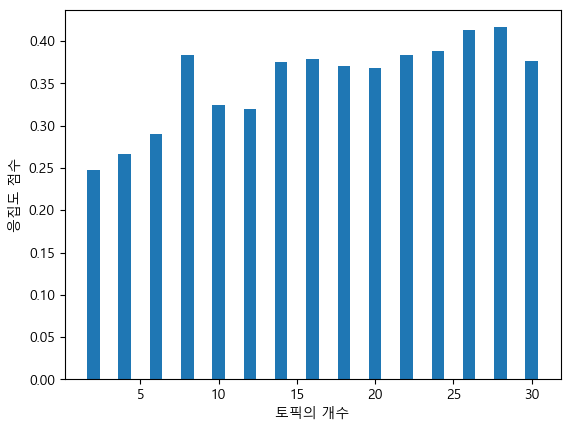

In [77]:
x = range(start, limit+1, step)
plt.bar(x, coherence_values)
plt.xlabel("토픽의 개수")
plt.ylabel("응집도 점수")
plt.show()

In [72]:
max(coherence_values)

0.31686122802980166

In [24]:
from gensim.models.coherencemodel import CoherenceModel

start = 2
end = 6
step = 1


def optimal_lda_model(corpus, dictionary, processed_documents, start=2, end=6, step=1):
    coherence_values = []
    lda_model_list = []
    for num_topics in range(start, end+1, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        lda_model_list.append(lda_model)
        coherence_model = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    optimal_model = lda_model_list[coherence_values.index(max(coherence_values))]
    return optimal_model



In [25]:
optimal_model = optimal_lda_model(corpus, dictionary, processed_documents)

In [26]:
topics = optimal_model.print_topics(num_words=30)

for topic in topics:
    print(topic)

(0, '0.005*"대통령" + 0.004*"서울" + 0.003*"병원" + 0.003*"환자" + 0.003*"경우" + 0.003*"지역" + 0.003*"발생" + 0.003*"의료" + 0.003*"치료" + 0.003*"관련" + 0.003*"기자" + 0.003*"때문" + 0.002*"위해" + 0.002*"미국" + 0.002*"기온" + 0.002*"사진" + 0.002*"사람" + 0.002*"뉴스" + 0.002*"대한" + 0.002*"대표" + 0.002*"문제" + 0.002*"가장" + 0.002*"여사" + 0.002*"사건" + 0.002*"의원" + 0.002*"통해" + 0.002*"상황" + 0.002*"한국" + 0.002*"대해" + 0.002*"교수"')
(1, '0.004*"시장" + 0.003*"대한" + 0.003*"애플" + 0.003*"국내" + 0.003*"미국" + 0.003*"사업" + 0.003*"기자" + 0.003*"한국" + 0.003*"올해" + 0.003*"중국" + 0.003*"기업" + 0.003*"위해" + 0.003*"대표" + 0.003*"서울" + 0.003*"경우" + 0.002*"사진" + 0.002*"매출" + 0.002*"때문" + 0.002*"통해" + 0.002*"진행" + 0.002*"사람" + 0.002*"개발" + 0.002*"최근" + 0.002*"정부" + 0.002*"투자" + 0.002*"제공" + 0.002*"아이폰" + 0.002*"출시" + 0.002*"전망" + 0.002*"지난해"')
(2, '0.008*"미국" + 0.008*"이스라엘" + 0.007*"헤즈볼라" + 0.006*"레바논" + 0.004*"대통령" + 0.004*"대한" + 0.003*"트럼프" + 0.003*"금리" + 0.003*"공습" + 0.003*"후보" + 0.003*"위해" + 0.003*"이후" + 0.003*"지역" + 0.003*"시장" + 0.003*"해리스" +